# EDA sur les données des collèges.
- analyse sur les données des collèges revue de la normalité
- corrélations visuelles sur les IPS et résultats du brevet. 


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv, find_dotenv

In [7]:
import platform
a = platform.system()

In [8]:
if a == 'Windows':
    load_dotenv("./.env",  override=True)
else:
    load_dotenv( dotenv_path="./.env.local", override=True)
cleandata = os.environ.get("EXPORTDIR")

In [9]:
dfCol = pd.read_csv(os.path.join(cleandata, "IPS_colleges_2016_2023.csv"))
dfDnb = pd.read_csv(os.path.join(cleandata, "resultat_brevet_2016_2022.csv"))

In [10]:
# merge des résultat IPS et brevet
df = dfCol.merge(dfDnb, how='left', left_on=["UAI","annee de diplome"],right_on=["Numero d'etablissement","Session"]).reset_index()
df = df.drop(columns=['level_0','Unnamed: 0_x','index','Unnamed: 0_y', "Numero d'etablissement", ])
df.columns

Index(['Rentrée scolaire', 'Académie', 'Code du département', 'Département',
       'UAI', 'Nom de l'établissement', 'Nom de la commune',
       'Code INSEE de la commune', 'Secteur', 'Effectifs', 'IPS',
       'Ecart-type de l'IPS', 'annee de rentree', 'annee de diplome',
       'Session', 'Type d'etablissement', 'Code académie', 'Code région',
       'Libellé région', 'Inscrits', 'Presents', 'Admis', 'Admis sans mention',
       'Nombre_d_admis_Mention_AB', 'Admis Mention bien',
       'Admis Mention très bien', 'Taux de réussite'],
      dtype='object')

<Axes: xlabel='IPS', ylabel='Taux de réussite'>

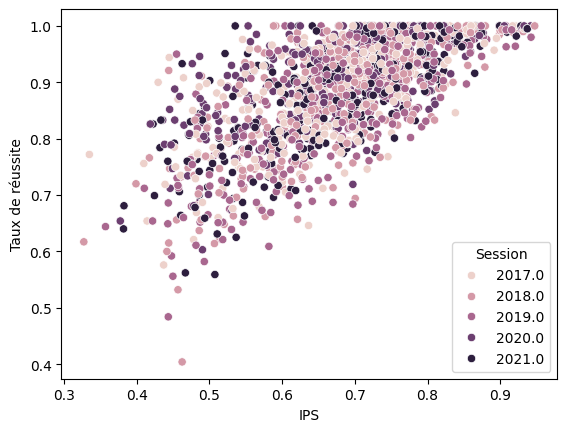

In [11]:
sns.scatterplot(df[df['Académie']=='LYON'], x='IPS', y='Taux de réussite', hue='Session')

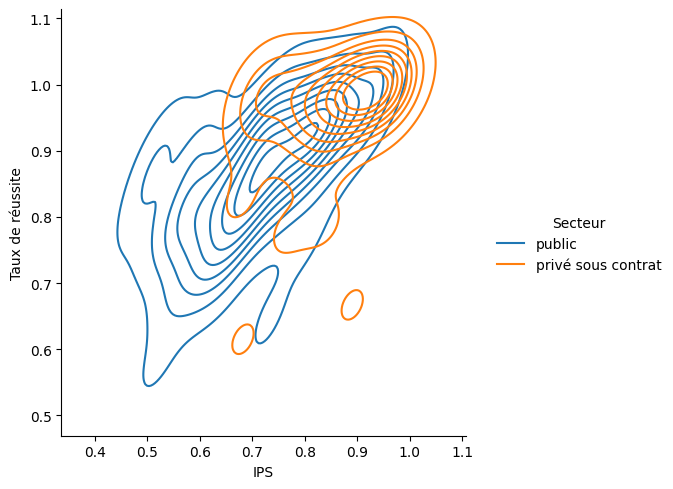

In [12]:
fig = sns.displot(df[(df.Académie =='PARIS')&(df.Session == 2021)], 
            x='IPS', 
            y='Taux de réussite', 
            hue='Secteur',
            kind="kde")

# fig.limit(x=(0,1),y=(0,1))